In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import os
import os.path as path
import seaborn as sns
import space_fortress_learning_pipeline
import utils_space_fortress
from tqdm import tqdm
sns.reset_orig()

%matplotlib inline
%load_ext autoreload

%autoreload 2
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams["font.size"] = "30"
sns.set(font_scale=2)

def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [2]:
DATAPATH = r"D:\Expérience SF 1.0\Résultats"

# Résultats de base

In [13]:
df_result_brut = pd.read_excel(path.join(DATAPATH, r"Analyse des scores\Saisie Résultats SF.xlsx"),)
df_result_brut.to_csv('df_stats_phase_1.csv')
df_donnees_qualitative = pd.read_excel(path.join(DATAPATH, r"Analyse des scores\données_qualitatives_échantillon.xlsx")).iloc[:, :5]
df_donnees_qualitative = df_donnees_qualitative.rename(columns={'# Participant ': 'Participant'})
df_donnees_qualitative = df_donnees_qualitative.drop(['Genre', 'Condition '], axis=1)
df_donnees_qualitative.index = df_donnees_qualitative.Participant
df_engagement = pd.read_excel(path.join(DATAPATH, r"Analyse des scores\EngagementSF.xlsx"), sheetname=1).iloc[:, 2:9]
df_engagement = df_engagement.rename(columns={'# de participant': 'Participant'})
df_engagement.index = df_engagement.Participant.values

In [4]:
df_donnees_qualitative.head()

Participant  Âge  Dominance Manuelle
Participant                                      
1                      1    20                  D
2                      2    26                  D
3                      3    30                  D
4                      4    39                  D
5                      5    28                  D

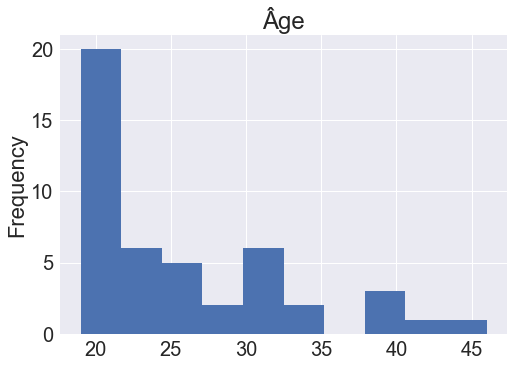

In [5]:
df_donnees_qualitative['Âge '].plot.hist()
plt.title('Âge')

In [6]:
df_engagement.head()

Participant  J'étais engagé envers mes objectifs.  \
2            2                                     5   
2            2                                     5   
2            2                                     5   
2            2                                     5   
2            2                                     5   

   Je me suis soucié d'atteindre mes objectifs  \
2                                            5   
2                                            5   
2                                            5   
2                                            5   
2                                            5   

   C'était important pour moi de performer à cette tâche.  \
2                                                  5        
2                                                  5        
2                                                  5        
2                                                  5        
2                                                  5        

   J'ai déployé beaucoup d'efforts dans la présente tâche.  \
2                                                  4         
2                                                  4         
2                                                  4         
2                                                  4         
2                                                  4         

   J'étais surchargé par cette tâche.  J'étais sous stimulé par cette tâche.  
2                                   3                                      5  
2                                   3                                      5  
2                                   3                                      5  
2                                   3                                      5  
2                                   4                                      5

In [7]:
df_result_brut.head()

Participant  Game  score_pnts  score_cntrl  score_vlcty  score_speed  \
0            2     1        -815          783          259          370   
1            2     2         -70          852          637          870   
2            2     3        -999          804          308          570   
3            2     4        -910          870          301          640   
4            2     5          40          858          413          810   

   score_flight  score_flight2  score_fortress  score_mine  score_mine2  \
0    469.711157    1703.795647            -550         -30         -100   
1    523.460410    1620.913754            -100         760          400   
2    427.881457    1625.461479            -700         180            0   
3    529.367941    1703.633929            -700         270           50   
4    460.889060    1624.049270            -300         800          450   

   score_bonus  score_performance  condition  Genre  Engagement   Surcharge  \
0          350        -345.288843           0     F         19.0        3.0   
1          300         453.460410           0     F         19.0        3.0   
2          111        -571.118543           0     F         19.0        3.0   
3          100        -380.632059           0     F         19.0        3.0   
4          400         500.889060           0     F         19.0        4.0   

   Sous-stimulation  
0               5.0  
1               5.0  
2               5.0  
3               5.0  
4               5.0

# Résultats données pré-traitées

In [12]:
df_cases = pd.read_csv(path.join(DATAPATH, "Analyses Originales", "AllofDataSFCompletecases.csv"),skipinitialspace=True).drop('Unnamed: 0', axis=1)
df_cases = df_cases.rename(columns={'sujet': 'participant'})
df_cases.participant = df_cases.participant.apply(lambda x : int(x.replace('Sujet ', ''))).astype(int)
df_cases = df_cases.sort_values(['participant', 'Session'], axis=0)
df_cases.index = df_cases.apply(lambda x : "par{},sess{}".format(x['participant'], x['Session']), axis=1)
df_cases['id'] = np.arange(len(df_cases))

df_cases

participant  Session  LongWindowPowerBands_HFPowerBand  \
par2,sess1              2        1                        239.434500   
par2,sess2              2        2                        164.686740   
par2,sess3              2        3                        187.466111   
par2,sess4              2        4                        150.123652   
par2,sess5              2        5                        192.152833   
par2,sess6              2        6                        223.559389   
par2,sess7              2        7                        217.487500   
par2,sess8              2        8                        153.147088   
par2,sess9              2        9                        155.144835   
par2,sess10             2       10                        167.626389   
par2,sess11             2       11                        162.430391   
par2,sess12             2       12                        205.736500   
par2,sess13             2       13                        512.296575   
par2,sess14             2       14                        232.188889   
par2,sess15             2       15                        178.338556   
par2,sess16             2       16                        277.562222   
par2,sess17             2       17                        302.404190   
par2,sess18             2       18                        368.351732   
par2,sess19             2       19                        175.104286   
par2,sess20             2       20                        457.002056   
par2,sess21             2       21                        528.500112   
par2,sess22             2       22                       1132.022431   
par2,sess23             2       23                        271.497542   
par2,sess24             2       24                        857.182333   
par3,sess1              3        1                         80.166413   
par3,sess2              3        2                         95.238836   
par3,sess3              3        3                        112.098138   
par3,sess4              3        4                        159.947701   
par3,sess5              3        5                        106.911989   
par3,sess6              3        6                         77.301632   
...                   ...      ...                               ...   
par39,sess6            39        6                       1684.268989   
par39,sess7            39        7                       1713.612667   
par39,sess8            39        8                       4784.181620   
par39,sess9            39        9                       6444.141000   
par39,sess10           39       10                      11801.732079   
par39,sess11           39       11                       7438.667697   
par45,sess1            45        1                        742.543167   
par45,sess2            45        2                       1099.490503   
par45,sess3            45        3                        740.186740   
par45,sess4            45        4                       1592.749556   
par45,sess5            45        5                        849.351685   
par45,sess6            45        6                        685.643187   
par45,sess7            45        7                        602.180278   
par45,sess8            45        8                        396.738389   
par45,sess9            45        9                        325.787348   
par45,sess10           45       10                        910.016425   
par45,sess11           45       11                        851.408111   
par45,sess12           45       12                        305.827596   
par45,sess13           45       13                        512.843536   
par45,sess14           45       14                        123.799330   
par45,sess15           45       15                         82.446313   
par45,sess16           45       16                         91.599779   
par45,sess17           45       17                        118.743923   
par45,sess18           45       18                    

In [9]:
# calculate the correlation matrix
corr = df_cases.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)
corr.style.apply(background_gradient,
               cmap=cmap,
               m=corr.min().min(),
               M=corr.max().max(),)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)

In [10]:
df_cases.groupby('participant').count()

Session  LongWindowPowerBands_HFPowerBand  \
participant                                              
2                 24                                24   
3                 15                                15   
5                 18                                18   
8                 24                                24   
11                24                                24   
13                14                                14   
14                 8                                 8   
15                24                                24   
17                15                                15   
18                14                                14   
20                15                                15   
21                24                                24   
22                24                                24   
23                24                                24   
27                20                                20   
28                21                                21   
29                24                                24   
33                24                                24   
34                19                                19   
35                17                                17   
39                 8                                 8   
45                24                                24   

             LongWindowPowerBands_HRVPowerBand  \
participant                                      
2                                           24   
3                                           15   
5                                           18   
8                                           24   
11                                          24   
13                                          14   
14                                           8   
15                                          24   
17                                          15   
18                                          14   
20                                          15   
21                                          24   
22                                          24   
23                                          24   
27                                          20   
28                                          21   
29                                          24   
33                                          24   
34                                          19   
35                                          17   
39                                           8   
45                                          24   

             LongWindowPowerBands_LFHFPowerBand  \
participant                                       
2                                            24   
3                                            15   
5                                            18   
8                                            24   
11                                           24   
13                                           14   
14                                            8   
15                                           24   
17                                           15   
18                                           14   
20                                           15   
21                                           24   
22                                           24   
23                                           24   
27                                           20   
28                                           21   
29                                           24   
33                                           24   
34                                           19   
35                                           17   
39                                            8   
45                                           24   

             LongWindowPowerBands_LFPowerBand  \
participant                                     
2                                          24   
3                                          15  

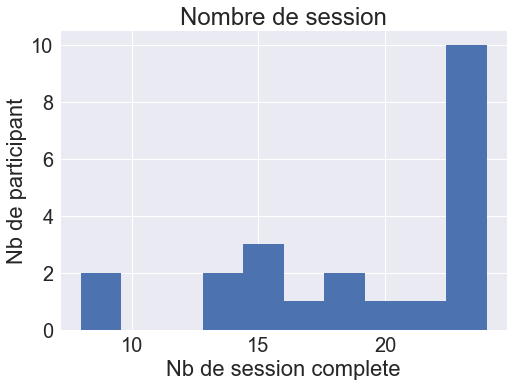

In [11]:
df_cases.groupby('participant').count()['Session'].plot.hist()
plt.title('Nombre de session')
plt.ylabel('Nb de participant')
plt.xlabel('Nb de session complete')

Les participants n'ont pas tous fait 24 session

## Signaux physio

In [13]:
physio_columns = df_cases.columns[2:59]
physio_columns = physio_columns.drop('BatteryVoltageInVolt')
list(physio_columns)

['LongWindowPowerBands_HFPowerBand',
 'LongWindowPowerBands_HRVPowerBand',
 'LongWindowPowerBands_LFHFPowerBand',
 'LongWindowPowerBands_LFPowerBand',
 'LongWindowPowerBands_ULFPowerBand',
 'LongWindowPowerBands_VLFPowerBand',
 'ShortWindowPowerBands_HFPowerBand',
 'ShortWindowPowerBands_HRVPowerBand',
 'ShortWindowPowerBands_LFHFPowerBand',
 'ShortWindowPowerBands_LFPowerBand',
 'ShortWindowPowerBands_ULFPowerBand',
 'ShortWindowPowerBands_VLFPowerBand',
 'standLongWindowPowerBands_LFHFPowerBand',
 'standLongWindowPowerBands_HRVPowerBand',
 'standLongWindowPowerBands_HFPowerBand',
 'standLongWindowPowerBands_LFPowerBand',
 'ActivityInVmu',
 'HeartRateInBpm',
 'HeartRateVariabilityInMillisecond',
 'LateralMinimumAccelerationInG',
 'LateralPeakAccelerationInG',
 'PeakAccelerationInG',
 'PostureInDegree',
 'RespirationRateInBpm',
 'SagittalMinimumAccelerationInG',
 'SagittalPeakAccelerationInG',
 'VerticalMinimumAccelerationInG',
 'VerticalPeakAccelerationInG',
 'StandBR',
 'StandHR',
 '

## Scores

Raw scores

In [14]:
raw_scores_columns = df_cases.columns[60:60+11]
df_cases[raw_scores_columns]

score_pnts  score_cntrl  score_vlcty  score_speed  score_flight  \
par2,sess1          -815          783          259          370    469.711157   
par2,sess2           -70          852          637          870    523.460410   
par2,sess3          -999          804          308          570    427.881457   
par2,sess4          -910          870          301          640    529.367941   
par2,sess5            40          858          413          810    460.889059   
par2,sess6          -445          849          357          960    435.107955   
par2,sess7           485          912          504         1110    398.376596   
par2,sess8            65          864          441          840    465.265958   
par2,sess9            65          822          357          580    362.394188   
par2,sess10        -1148          783          462          510     98.204653   
par2,sess11         -560          825          406          900    402.305737   
par2,sess12          320          765         -154          570    373.348220   
par2,sess13         -765          768          280          470    257.984135   
par2,sess14          510          885          490          600    464.625488   
par2,sess15         -275          765          231          850    359.218697   
par2,sess16        -1455          840          126          860    394.609096   
par2,sess17          -45          918           49          670    624.462832   
par2,sess18         -520          837          -98          610    533.842320   
par2,sess19          515          834          119          610    546.525223   
par2,sess20          130          858          -91          870    634.384953   
par2,sess21         -315          861          364          860    505.033052   
par2,sess22          -75          882         -203         1060    484.872690   
par2,sess23         -955          870          -56          530    551.746310   
par2,sess24          625          885          133          770    581.764414   
par3,sess1           500         1014          336          740    504.936565   
par3,sess2          1010          948          490         1130    496.423017   
par3,sess3           938          996          805         1160    386.264455   
par3,sess4          1080          927          798          930    437.132712   
par3,sess5          1890          978          980         1110    350.713288   
par3,sess6          1375         1008         1120          890    301.085337   
...                  ...          ...          ...          ...           ...   
par39,sess6        -1324          951         1078          630    232.500225   
par39,sess7         -165          954          868         1010    224.327877   
par39,sess8         -882          969          882          950    348.397799   
par39,sess9          920          951         1022         1020    336.999580   
par39,sess10        -710          945          777          760    430.749987   
par39,sess11         180         1020         1092         1100    337.821500   
par45,sess1        -1375          744          469          660   -163.444197   
par45,sess2        -1200          720           63         1050   -157.224870   
par45,sess3        -1550          696          182          720   -125.308490   
par45,sess4        -1225          708          245          450    -49.645934   
par45,sess5        -2180          747          441          560     43.174331   
par45,sess6        -2425          717          497          450    -58.174703   
par45,sess7        -1150          714          924          880   -148.519796   
par45,sess8         -292          642         -140          460   -284.901369   
par45,sess9        -1725          690          161          510   -192.709055   
par45,sess10       -1379          783          693          790     66.616600   
par45,sess11        -430          720          623          700     57.123246   
par45,sess12        -905          675        

(21, 24)

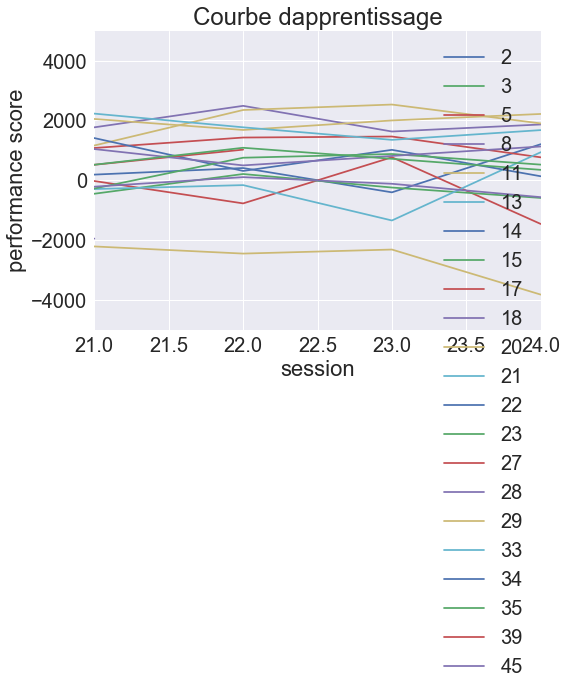

In [15]:
for participant in set(df_cases.participant):
    df_par = df_cases[df_cases.participant==participant]
    plt.plot(df_par.Session, df_par.score_performance)
    
plt.xlabel('session')
plt.ylabel('performance score')
plt.title('Courbe d''apprentissage')
plt.legend(set(df_cases.participant))
plt.ylim([-5000, 5000])
plt.xlim([21, 24])

(-3000, 3000)

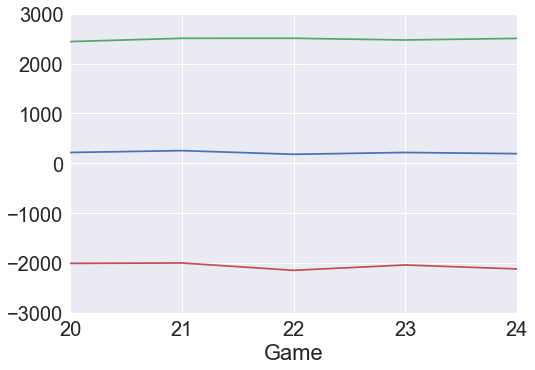

In [16]:
df_result_brut.groupby('Game').mean()['score_performance'].plot()
(df_result_brut.groupby('Game').std()['score_performance'] + df_result_brut.groupby('Game').mean()['score_performance']).plot()
(-df_result_brut.groupby('Game').std()['score_performance'] + df_result_brut.groupby('Game').mean()['score_performance']).plot()
plt.xlim([20,24])
plt.ylim([-3000, 3000])

Standardized scores

In [15]:
stand_scores_columns = df_cases.columns[-12:-1]
df_cases[stand_scores_columns]

stand_score_pnts  stand_score_cntrl  stand_score_vlcty  \
par2,sess1           -0.923999          -1.308834           0.104771   
par2,sess2            0.350483           0.241545           1.740711   
par2,sess3           -1.238771          -0.836980           0.316837   
par2,sess4           -1.086517           0.645991           0.286542   
par2,sess5            0.538661           0.376360           0.771265   
par2,sess6           -0.291035           0.174137           0.528904   
par2,sess7            1.299929           1.589700           1.165103   
par2,sess8            0.581429           0.511176           0.892446   
par2,sess9            0.581429          -0.432533           0.528904   
par2,sess10          -1.493667          -1.308834           0.983332   
par2,sess11          -0.487767          -0.365125           0.740970   
par2,sess12           1.017661          -1.713281          -1.682646   
par2,sess13          -0.838464          -1.645873           0.195656   
par2,sess14           1.342697           0.983030           1.104512   
par2,sess15          -0.000214          -1.713281          -0.016410   
par2,sess16          -2.018856          -0.028087          -0.470838   
par2,sess17           0.393250           1.724516          -0.804085   
par2,sess18          -0.419339          -0.095494          -1.440284   
par2,sess19           1.351250          -0.162902          -0.501133   
par2,sess20           0.692625           0.376360          -1.409989   
par2,sess21          -0.068642           0.443768           0.559199   
par2,sess22           0.341929           0.915622          -1.894712   
par2,sess23          -1.163499           0.645991          -1.258513   
par2,sess24           1.539429           0.983030          -0.440543   
par3,sess1           -2.063876           0.281368          -3.036314   
par3,sess2           -1.261887          -1.426247          -2.400890   
par3,sess3           -1.375109          -0.184345          -1.101160   
par3,sess4           -1.151810          -1.969579          -1.130043   
par3,sess5            0.121936          -0.650058          -0.379088   
par3,sess6           -0.687915           0.126131           0.198570   
...                        ...                ...                ...   
par39,sess6          -1.686758          -0.778764           1.524424   
par39,sess7          -0.069257          -0.683405           0.037181   
par39,sess8          -1.069903          -0.206611           0.136331   
par39,sess9           1.444970          -0.778764           1.127826   
par39,sess10         -0.829859          -0.969481          -0.607291   
par39,sess11          0.412226           1.414489           1.623574   
par45,sess1          -0.645152           0.806674           0.619838   
par45,sess2          -0.382616           0.016463          -0.730419   
par45,sess3          -0.907688          -0.773749          -0.334654   
par45,sess4          -0.420121          -0.378643          -0.125132   
par45,sess5          -1.852819           0.905451           0.526717   
par45,sess6          -2.220370          -0.082314           0.712959   
par45,sess7          -0.307605          -0.181090           2.133057   
par45,sess8           0.979573          -2.551725          -1.405547   
par45,sess9          -1.170225          -0.971302          -0.404495   
par45,sess10         -0.651153           2.090768           1.364807   
par45,sess11          0.772545           0.016463           1.132004   
par45,sess12          0.059946          -1.465184          -0.218253   
par45,sess13          0.547513           0.806674          -0.311374   
par45,sess14         -0.105077          -0.477420          -0.311374   
par45,sess15         -0.510133          -0.378643          -0.451056   
par45,sess16         -0.517634           0.115239          -1.778032   
par45,sess17          1.335123          -1.168855          -1.591790   
par45,sess18          0.547513           1.399333     

### Diff raw score
différence entre le score précédant et le score actuelle

In [16]:
lim = 0.0 # std

def diff_score(se, columns):
    session = se.Session
    if session == 1:
        diff_scores = se[columns] + np.nan
        diff_scores.index = 'diff_' + diff_scores.index
        bin_scores = pd.Series(data=[np.nan] * len(diff_scores), index=('bin_' + diff_scores.index))
    else:
        diff_scores = se[columns] - df_cases[df_cases.id==(se.id-1)].iloc[0][columns]
        diff_scores.index = 'diff_' + diff_scores.index
        bin_scores = (diff_scores>(lim*diff_scores.std())).astype(np.float32)
        bin_scores.index = 'bin_' + diff_scores.index
    
    new_se = diff_scores.append(bin_scores)
    new_se.name = se.name
    return new_se

df_cases_with_bin_score = pd.concat([df_cases, df_cases.apply(diff_score, axis=1, columns=raw_scores_columns)], axis=1, ignore_index=False)
df_cases_with_bin_score
diff_scores_columns = [x for x in df_cases_with_bin_score.columns if 'diff' in x]
df_cases_with_bin_score[diff_scores_columns]

diff_score_pnts  diff_score_cntrl  diff_score_vlcty  \
par2,sess1                NaN               NaN               NaN   
par2,sess2              745.0              69.0             378.0   
par2,sess3             -929.0             -48.0            -329.0   
par2,sess4               89.0              66.0              -7.0   
par2,sess5              950.0             -12.0             112.0   
par2,sess6             -485.0              -9.0             -56.0   
par2,sess7              930.0              63.0             147.0   
par2,sess8             -420.0             -48.0             -63.0   
par2,sess9                0.0             -42.0             -84.0   
par2,sess10           -1213.0             -39.0             105.0   
par2,sess11             588.0              42.0             -56.0   
par2,sess12             880.0             -60.0            -560.0   
par2,sess13           -1085.0               3.0             434.0   
par2,sess14            1275.0             117.0             210.0   
par2,sess15            -785.0            -120.0            -259.0   
par2,sess16           -1180.0              75.0            -105.0   
par2,sess17            1410.0              78.0             -77.0   
par2,sess18            -475.0             -81.0            -147.0   
par2,sess19            1035.0              -3.0             217.0   
par2,sess20            -385.0              24.0            -210.0   
par2,sess21            -445.0               3.0             455.0   
par2,sess22             240.0              21.0            -567.0   
par2,sess23            -880.0             -12.0             147.0   
par2,sess24            1580.0              15.0             189.0   
par3,sess1                NaN               NaN               NaN   
par3,sess2              510.0             -66.0             154.0   
par3,sess3              -72.0              48.0             315.0   
par3,sess4              142.0             -69.0              -7.0   
par3,sess5              810.0              51.0             182.0   
par3,sess6             -515.0              30.0             140.0   
...                       ...               ...               ...   
par39,sess6            -989.0             -54.0             154.0   
par39,sess7            1159.0               3.0            -210.0   
par39,sess8            -717.0              15.0              14.0   
par39,sess9            1802.0             -18.0             140.0   
par39,sess10          -1630.0              -6.0            -245.0   
par39,sess11            890.0              75.0             315.0   
par45,sess1               NaN               NaN               NaN   
par45,sess2             175.0             -24.0            -406.0   
par45,sess3            -350.0             -24.0             119.0   
par45,sess4             325.0              12.0              63.0   
par45,sess5            -955.0              39.0             196.0   
par45,sess6            -245.0             -30.0              56.0   
par45,sess7            1275.0              -3.0             427.0   
par45,sess8             858.0             -72.0           -1064.0   
par45,sess9           -1433.0              48.0             301.0   
par45,sess10            346.0              93.0             532.0   
par45,sess11            949.0             -63.0             -70.0   
par45,sess12           -475.0             -45.0            -406.0   
par45,sess13            325.0              69.0             -28.0   
par45,sess14           -435.0             -39.0               0.0   
par45,sess15           -270.0               3.0             -42.0   
par45,sess16             -5.0              15.0            -399.0   
par45,sess17           1235.0             -39.0              56.0   
par45,sess18           -525.0              78.0             651.0   
par45,sess19            370.0             -39.0              35.0   
par45,sess20           -795.0               9.0            -119.0   
par45,sess21

### Diff score distribution

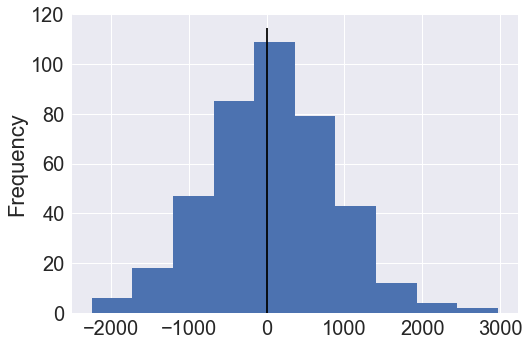

In [17]:
df_cases_with_bin_score['diff_score_pnts'].plot.hist()
plt.vlines(lim*df_cases_with_bin_score['diff_score_pnts'].std(), plt.gca().axis()[2] , plt.gca().axis()[3])

# Machine learning

On prend le score "performance" comme cible. 
La version binaire diff est utilisé. Donc le taux de changement du score performance. 0 si changement négatif, ou 1 si changement positif

In [18]:
df_valid = df_cases_with_bin_score.dropna()
df_valid.to_csv('df_valid.csv')

participants = list(set(df_valid.participant))
groups = df_valid.participant

## Choix de classification ou regression et du score

In [19]:
Y_class = df_valid.bin_diff_score_performance.astype(int).as_matrix()
Y_regr  = df_valid.score_performance.astype(np.float32).as_matrix()

X_columns = list(physio_columns) + ['Session']
X = df_valid[X_columns].astype(np.float32).as_matrix()

Y = Y_class

X.shape, Y.shape

((405, 57), (405,))

## Extraction de features statistiquement significatives

In [20]:
from tsfresh.feature_selection.selection import select_features

X_selected = select_features(pd.DataFrame(X), Y_class, ml_task='classification',)

print(X_selected.columns)

C:\Users\AlexisFCote\Anaconda3\envs\SpaceFortress\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


RangeIndex(start=0, stop=0, step=1)


Aucune features sont statistiquement significatives directement

## Train test split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

cv_all = GroupShuffleSplit(n_splits=1)

train_all, test_all = next(cv_all.split(X, Y, groups=groups))
X_train = X[train_all]
X_test  = X[test_all]

Y_train = Y[train_all]
Y_test  = Y[test_all]

### Scaler

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

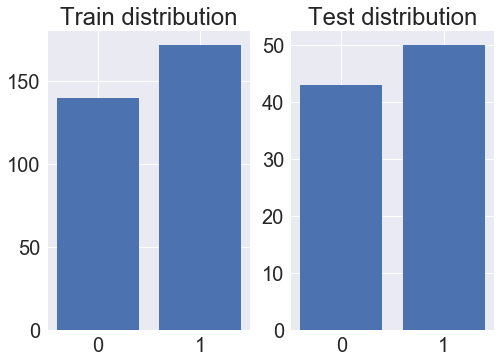

In [23]:
plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=[-0.4, 0.4, 0.6, 1.4])
plt.title('Train distribution')
plt.subplot(1, 2, 2)
plt.hist(Y_test, bins=[-0.4, 0.4, 0.6, 1.4])
plt.title('Test distribution')
plt.show()


## Model training

### Train folding split

In [24]:
train_groups = df_valid.participant.iloc[train_all]
group_kfold = GroupShuffleSplit(n_splits=10)

### Models

In [25]:
from utils_space_fortress import print_results, print_cross_val_results

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

sk_dummy = DummyClassifier(strategy='most_frequent')

sk_dummy.fit(X, Y)
print_results(sk_dummy, X, X, Y, Y)

sk_dummy = DummyClassifier(strategy='stratified')

sk_dummy.fit(X, Y)
print_results(sk_dummy, X, X, Y, Y)



<class 'sklearn.dummy.DummyClassifier'>
train accuracy : 0.548
test accuracy : 0.548
test roc_auc_score : 0.500
[[  0 183]
 [  0 222]]


C:\Users\AlexisFCote\Anaconda3\envs\SpaceFortress\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       183
          1       0.55      1.00      0.71       222

avg / total       0.30      0.55      0.39       405


<class 'sklearn.dummy.DummyClassifier'>
train accuracy : 0.467
test accuracy : 0.499
test roc_auc_score : 0.490
[[ 73 110]
 [ 93 129]]
             precision    recall  f1-score   support

          0       0.44      0.40      0.42       183
          1       0.54      0.58      0.56       222

avg / total       0.49      0.50      0.50       405




In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
   'n_estimators':[2, 5, 8, 12, 18, 25, 35, 50], 
   'max_depth':range(2,8,1), 
   'min_samples_split':range(2,10,1), 
   'min_samples_leaf':range(2,10,1), 
   'max_features':range(7,20,2), 
   'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
   'learning_rate':[0.1, 0.01, 0.2]
}

sk_gbc_cv = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, n_iter=30, scoring='accuracy', n_jobs=-1, verbose=5, cv=group_kfold)

sk_gbc_cv.fit(X_train, Y_train, groups=train_groups)
print_results(sk_gbc_cv, X_train, X_test, Y_train, Y_test)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 216 out of 300 | elapsed:    9.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


{'max_depth': 7, 'subsample': 0.6, 'learning_rate': 0.2, 'n_estimators': 25}
Best cv score : 0.576
<class 'xgboost.sklearn.XGBClassifier'>
train accuracy : 0.990
test accuracy : 0.484
test roc_auc_score : 0.479
[[18 25]
 [23 27]]
             precision    recall  f1-score   support

          0       0.44      0.42      0.43        43
          1       0.52      0.54      0.53        50

avg / total       0.48      0.48      0.48        93




In [28]:
import pickle
with open('gbc_cv.pkl','wb') as f: 
    pickle.dump(sk_gbc_cv,f)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier

param_grid_SVC = [{'C': [1, 10, 100, 1000]}]
sk_LinearSVC = GridSearchCV(LinearSVC(), param_grid_SVC, scoring='accuracy', n_jobs=-1, verbose=0, cv=3,)

sk_classifiers = [LogisticRegression(),
                  RidgeClassifier(),
                  KNeighborsClassifier(),
                  GaussianProcessClassifier(),
                  sk_LinearSVC,
                  SVC(),
                  RandomForestClassifier(),
                  XGBClassifier()]

for sk_classifier in sk_classifiers:
    sk_classifier.fit(X_train, Y_train)
    print_results(sk_classifier, X_train, X_test, Y_train, Y_test)

<class 'sklearn.linear_model.logistic.LogisticRegression'>
train accuracy : 0.670
test accuracy : 0.527
test roc_auc_score : 0.518
[[17 26]
 [18 32]]
             precision    recall  f1-score   support

          0       0.49      0.40      0.44        43
          1       0.55      0.64      0.59        50

avg / total       0.52      0.53      0.52        93


<class 'sklearn.linear_model.ridge.RidgeClassifier'>
train accuracy : 0.696
test accuracy : 0.516
test roc_auc_score : 0.508
[[17 26]
 [19 31]]
             precision    recall  f1-score   support

          0       0.47      0.40      0.43        43
          1       0.54      0.62      0.58        50

avg / total       0.51      0.52      0.51        93


<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
train accuracy : 0.676
test accuracy : 0.527
test roc_auc_score : 0.521
[[19 24]
 [20 30]]
             precision    recall  f1-score   support

          0       0.49      0.44      0.46        43
          1 

# Performance de chaque label

In [42]:
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel

discard_std_lim = 0 

param_grid = {
   'n_estimators':[2, 5, 8, 12, 18, 25, 35, 50], 
   'max_depth':range(2,5,1), 
   'subsample':[0.75, 1],
   'learning_rate':[0.1]
}

# Set the parameters by cross-validation


sk_gbc_cv = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', n_jobs=4, verbose=0, cv=10,)
selection_classifier = LinearSVC()

scores = pd.DataFrame()
space_fortress_classifier = sk_gbc_cv
#space_fortress_classifier = Pipeline([('RobustScaler', RobustScaler()), ('sf_class', space_fortress_classifier)])
space_fortress_classifier = Pipeline([('RobustScaler', RobustScaler()),
                                      #('Feature selection', SelectFromModel(selection_classifier)),
                                      ('sf_class', space_fortress_classifier)])


for col in tqdm([x for x in df_valid.columns if 'bin_' in x]):
    score_col = col.replace('bin_','')
    mask = (np.abs(df_valid[score_col]-df_valid[score_col].mean())>=(discard_std_lim*df_valid[score_col].std()))
    df_score_selection = df_valid.loc[mask, :]
    groups_selection = groups[mask]
    X = df_score_selection[X_columns].astype(np.float32).as_matrix()
    Y = df_score_selection.loc[:,col]
    score = cross_val_score(space_fortress_classifier, X, Y, groups=groups_selection, cv=LeaveOneGroupOut(), n_jobs=6)
    scores[col] = pd.Series(data=[np.mean(score), np.std(score)], index=['mean', 'std'])
scores = scores.T

scores = scores.sort_values('mean', ascending=False)
scores

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [15:42<00:00, 78.99s/it]


mean       std
bin_diff_score_mine2        0.560359  0.108941
bin_diff_score_flight2      0.550050  0.129677
bin_diff_score_bonus        0.541934  0.138507
bin_diff_score_fortress     0.534585  0.125820
bin_diff_score_mine         0.531348  0.127586
bin_diff_score_pnts         0.519823  0.086140
bin_diff_score_cntrl        0.515783  0.109296
bin_diff_score_performance  0.507891  0.070567
bin_diff_score_flight       0.489714  0.078246
bin_diff_score_vlcty        0.462516  0.086630
bin_diff_score_speed        0.448002  0.113045

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_predict

col = scores.index[0]
score_col = col.replace('bin_','')
mask = (np.abs(df_valid[score_col]-df_valid[score_col].mean())>=(discard_std_lim*df_valid[score_col].std()))
df_score_selection = df_valid.loc[mask, :]
groups_selection = groups[mask]

X = df_score_selection[X_columns].astype(np.float32).as_matrix()
Y = df_score_selection.loc[:,col].astype(np.float32).as_matrix()


cv = LeaveOneGroupOut()

pred = cross_val_predict(space_fortress_classifier, X, Y, groups=groups_selection, cv=cv, n_jobs=4)
utils_space_fortress.print_classification_report(Y, pred)

space_fortress_classifier.fit(X, Y)

test accuracy : 0.565
test roc_auc_score : 0.566
[[110  94]
 [ 82 119]]
             precision    recall  f1-score   support

        0.0       0.57      0.54      0.56       204
        1.0       0.56      0.59      0.57       201

avg / total       0.57      0.57      0.57       405




Pipeline(steps=[('RobustScaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('sf_class', GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0....re_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0))])

In [40]:
if 'Feature selection' in space_fortress_classifier.named_steps:
    selected_columns = pd.Series(X_columns)[space_fortress_classifier.named_steps['Feature selection'].get_support()]
else:
    selected_columns = pd.Series(X_columns)
selected_columns

1                     LongWindowPowerBands_HRVPowerBand
2                    LongWindowPowerBands_LFHFPowerBand
3                      LongWindowPowerBands_LFPowerBand
9                     ShortWindowPowerBands_LFPowerBand
10                   ShortWindowPowerBands_ULFPowerBand
11                   ShortWindowPowerBands_VLFPowerBand
13               standLongWindowPowerBands_HRVPowerBand
14                standLongWindowPowerBands_HFPowerBand
15                standLongWindowPowerBands_LFPowerBand
19                        LateralMinimumAccelerationInG
20                           LateralPeakAccelerationInG
22                                      PostureInDegree
24                       SagittalMinimumAccelerationInG
25                          SagittalPeakAccelerationInG
29                                              StandHR
41    MBlink_BlinkDurationStandardDeviationLongWindo...
42    MBlink_BlinkDurationStandardDeviationShortWind...
43               MBlink_BlinkFrequencyLongWindow

In [41]:
print(space_fortress_classifier.named_steps['sf_class'].best_estimator_)

feature_importance = pd.Series(data=space_fortress_classifier.named_steps['sf_class'].best_estimator_.feature_importances_, index=selected_columns)
feature_importance.sort_values(ascending=False)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=5, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


StandHR                                                     0.333333
standLongWindowPowerBands_LFPowerBand                       0.200000
LongWindowPowerBands_LFPowerBand                            0.200000
standLongWindowPowerBands_HFPowerBand                       0.133333
LongWindowPowerBands_LFHFPowerBand                          0.066667
MBlink_BlinkDurationStandardDeviationLongWindowInSecond     0.066667
MeanVelocityInDegBySecondShortWindow                        0.000000
ShortWindowPowerBands_LFPowerBand                           0.000000
ShortWindowPowerBands_ULFPowerBand                          0.000000
ShortWindowPowerBands_VLFPowerBand                          0.000000
standLongWindowPowerBands_HRVPowerBand                      0.000000
LateralPeakAccelerationInG                                  0.000000
LateralMinimumAccelerationInG                               0.000000
MeanVelocityInDegBySecondLongWindow                         0.000000
PostureInDegree                   

In [101]:
df_result = pd.DataFrame([Y, pred, groups_selection], index=['label', 'pred', 'participant']).T

for par in set(df_result.participant):
    df_result.loc[df_result.participant==par, 'session'] = np.arange(len(df_result[df_result.participant==par]))
    
df_pred = df_result.pivot(index='participant', columns='session', values='pred')
df_label = df_result.pivot(index='participant', columns='session', values='label')


good = (df_pred==df_label).astype(float)
good[df_label.isnull()] = np.nan

def return_color(x):
    if x == 1.0:
        return 'background-color: green'
    elif np.isnan(x):
        return 'color: white'
    else:
        return 'background-color: red'


def style_from_another_df(df, df_to_use, style_func):
    return df_to_use.applymap(style_func)

df_label.style.apply(style_from_another_df, axis=None, df_to_use=good, style_func=return_color).set_properties(**{'width': '30px'}).set_caption(col)

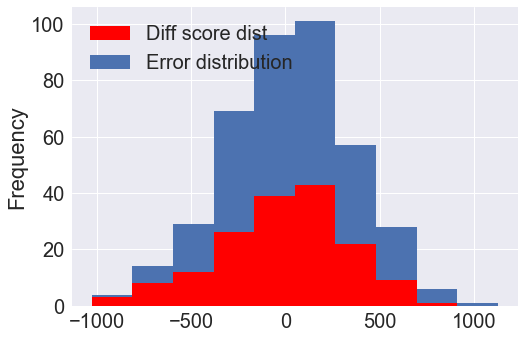

In [314]:
good_vector = pred==Y
good_vector
(n, bins, patches) = plt.hist(df_score_selection[col.replace('bin_', '')])

df_score_selection[col.replace('bin_', '')][~good_vector].plot.hist(color='red', bins=bins)
plt.legend(['Diff score dist', 'Error distribution'], loc='best', mode='expand')


array([-1025.,  -810.,  -595.,  -380.,  -165.,    50.,   265.,   480.,
         695.,   910.,  1125.])